# AM207 Homework 2

##### Data: wine_quality_missing.csv

**Harvard University**<br>
**Fall 2018**<br>
**Instructors: Rahul Dave**<br>
**Due Date: ** Saturday, September 22nd, 2018 at 11:59pm

**Instructions:**

- Upload your final answers in the form of a Jupyter notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

In [33]:
import numpy as np
import scipy.stats
import scipy.special
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import cm
import pandas as pd
np.random.seed(1)
%matplotlib inline

## Question 1: Give Me the Full Monte, Carlo Ancelotti

**Coding required**

In the quiet moments that transpire just before the sun rises that find us taking the walk of shame we can only send up quiet prayers to deities unknown that our path has not unknowingly taken us down the Boulevard of Broken Dreams (*Green Day*).  Along this road you'll find scattered the shattered hearts of formerly aspiring humorists -- the sorts of folk who might admire "the giggle at a funeral" (*Hozier*) distributed according to the function $\heartsuit(\theta) \sim \frac{ {\rm sin^{24}}\theta}{\theta^2}$ from $0< \theta< \infty$ and otherwise.  As a current aspiring humorist, it is your job to try to integrate $\heartsuit(\theta)$ in order to size up the jar you'll take with you as you go heart collecting (*Christina Perri*).  Who do you think you are anyway?

1.1. Visualize $\heartsuit(\theta)$.  Make sure your plot includes a title and axes labels.

1.2. The domain of $\heartsuit(\theta)$ is unbounded.  The version of Monte Carlo that we've explored so far requires a bounded domain.  Make an argument that we can integrate this function over the bounded domain [0, M] and get an accurate result.  What value of M should you choose to get a result within 0.001 of the exact solution?

1.3. Write a function `simulate_heart_collection` to estimate $\int_{0}^{\infty}\heartsuit (\theta) $ using the standard Monte Carlo method with $N=100000$.  Use the bounds you justified in 1.2.  What is your estimate?

1.4. It turns out that integrals of the form $\int_{0}^{\infty} \frac{ {\rm sin}x^{2n}}{x^2} dx$ have the closed form solution $\frac{\pi}{2^{2n-1}} \binom{2n-2}{n-1}$.  How accurate was your estimate?

1.5. The teaching staff of AM 207 has gone on and on in class and lab about putting error bars on estimates and finding confidence intervals.  In order to do this you need to run your experiment a number of times. Repeat your estimation process 1000 times and plot a histogram of your results marking the exact answer and your estimate with a vertical line.  

1.6. Based on your experiments, find the standard error of your estimate as well as a 95% confidence interval.  Was the true value of $\int_{0}^{\infty}\heartsuit (\theta)$ within the 95% confidence interval?

1.7. It turns out that an appropriately chosen change of variables will allow you to estimate the integral on the part of the domain you truncated in 1.2 and 1.3.  Execute this change of variables and use monte carlo integration to evaluate $\int_{M}^{\infty}\heartsuit (\theta) $

1.8. Based on your answer in 1.7 was your choice of M justified? 

### Answers

<div class="answer-separator">
------------------------
</div>

<h4>1.1. Visualize $\heartsuit(\theta)$.  Make sure your plot includes a title and axes labels.</h4>

/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


Text(0,0.5,'density')

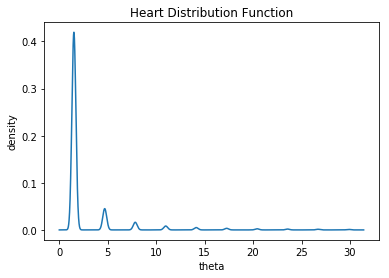

In [34]:
def heart(theta):
    return np.sin(theta)**24/theta**2

x = np.arange(0,10*np.pi,0.01) 
y = heart(x)

plt.plot(x, y)
plt.title('Heart Distribution Function')
plt.xlabel('theta')
plt.ylabel('density')

<div class="answer">

<br>

<br>

</div>

<div class="answer-separator">
------------------------
</div>

<h4>1.2. The domain of $\heartsuit(\theta)$ is unbounded.  The version of Monte Carlo that we've explored so far requires a bounded domain.  Make an argument that we can integrate this function over a bounded domain and get an accurate result.  What bounds should you choose to get a result within 0.001 of the exact solution?</h4>

<div class="answer">

<br>
We can rewrite $\int_{0}^{\infty}\heartsuit (\theta) - \int_{0}^{M}\heartsuit (\theta) =\int_{M}^{\infty}\heartsuit (\theta)$. We know  $\int_{M}^{\infty}\heartsuit (\theta)$ is positive so we need to find $M$ such that $\int_{M}^{\infty}\heartsuit (\theta) < 0.001$, which would ensure our approximate integral $ \int_{0}^{M}\heartsuit (\theta)$ is within the desired level of accuracy.

Since $\heartsuit (\theta)$ is bounded above by $\frac{1}{\theta^2}$, we know that if $\int_{M}^{\infty}\frac{1}{\theta^2} < 0.001$, then $\int_{M}^{\infty}\heartsuit (\theta) < 0.001$.

$$
\begin{split}
\int_{M}^{\infty}\frac{1}{\theta^2} &= \left[-\frac{1}{\theta}\right]_M^\infty \\
&= \frac{1}{M}
\end{split}
$$

When $M > 1000$, we know that 
$$
0.001 > \int_{M}^{\infty}\frac{1}{\theta^2} >\int_{M}^{\infty}\heartsuit (\theta) = \int_{0}^{\infty}\heartsuit (\theta) - \int_{0}^{M}\heartsuit (\theta) > 0
$$
<br>

</div>

<div class="answer-separator">
------------------------
</div>

<h4>1.3. Write a function `simulate_heart_collection` to estimate $\int_{0}^{\infty}\heartsuit (\theta) $ using the standard Monte Carlo method with $N=100000$.  Use the bounds you justified in 1.2.  What is your estimate?</h4>

In [35]:

def monte_carlo_int(a, b, N, f): 
    X = np.random.uniform(low=a, high=b, size=N) # N values uniformly drawn from a to b 
    Y = f(X)   # CALCULATE THE f(x) 
    V = b-a
    return V * np.sum(Y)/ N;

estimate = monte_carlo_int(0, 1000, 100000, heart)
print("Monte Carlo estimation={}".format(estimate))


Monte Carlo estimation=0.2630654521518475


<div class="answer-separator">
------------------------
</div>

<h4>1.4. It turns out that integrals of the form $\int_{0}^{\infty} \frac{ {\rm sin}x^{2n}}{x^2} dx$ have the closed form solution $\frac{\pi}{2^{2n-1}} \binom{2n-2}{n-1}$.  How accurate was your estimate?</h4>

In [36]:
n = 24/2
exact_value = scipy.special.comb(2*n-2, n-2)*np.pi/(2**(2*n-1))
print("The true value of the integral is {}".format(exact_value))
print("Our estimate had error = {}".format(abs(exact_value-estimate)))

The true value of the integral is 0.24217347181716267
Our estimate had error = 0.02089198033468484


<div class="answer-separator">
------------------------
</div>

<h4>1.5. The teaching staff of AM 207 has gone on and on in class and lab about putting error bars on estimates and finding confidence intervals.  In order to do this you need to run your experiment a number of times.  Repeat your estimation process 1000 times and plot a histogram of your results marking the exact answer and your estimate with a vertical line.</h4>

In [37]:
def viz_estimates(viz_axis, viz_data, viz_label, viz_color,  x_label, viz_title, sample_estimate, estimate_label, true_value, true_label, bin_count=20):

        
    #plot histogram
    _, viz_bins, _ = viz_axis.hist(viz_data, bins=bin_count, facecolor=viz_color, edgecolor='white', label="Additional Samples", density=True, alpha=0.6)

    viz_axis.axvline(x=sample_estimate, linewidth=4, color='r', label=estimate_label)
    viz_axis.axvline(x=true_value, linewidth=4, color='b', label=true_label)
    viz_axis.set_xlabel(x_label)
    viz_axis.set_title(viz_title)
    viz_axis.legend(loc='best')

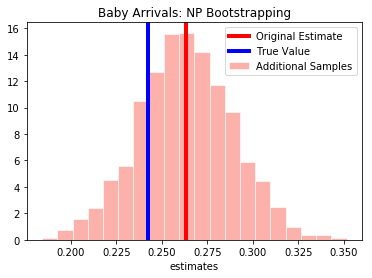

In [38]:
estimates = [monte_carlo_int(0, 1000, 100000, heart) for _ in range(1000)]

fig, ax = plt.subplots()

viz_estimates(
    ax,
    estimates,
    'Estimates of Integral',
    'salmon',
    'estimates',
    'Baby Arrivals: NP Bootstrapping',
    estimate,
    'Original Estimate',
    exact_value,
    "True Value"
)


<div class="answer">

<br>
*Your Answer Here*
<br>

</div>

<div class="answer-separator">
------------------------
</div>

<h4>1.6. Based on your experiments, find the standard error of your estimate as well as a 95% confidence interval.  Was the true value of $\int_{0}^{\infty}\heartsuit (\theta)$ within the 95% confidence interval?</h4>

In [39]:
# standard error
standard_error = np.std(estimates)
print("Standard error:", standard_error)

# confidence interval
percentile_interval = np.percentile(estimates, [2.5, 97.5])
percentile_interval -= percentile_interval[0]
percentile_interval -= percentile_interval[1]/2
print("95% confidence interval ", estimate+ percentile_interval)

Standard error: 0.0258579963882698
95% confidence interval  [0.21160112 0.31452978]


<div class="answer">

<br>
$\int_{0}^{\infty}\heartsuit (\theta) = 0.242$ is within the confidence interval
<br>

</div>

<div class="answer-separator">
------------------------
</div>

<h4>1.7. It turns out that an appropriately chosen change of variables will allow you to estimate the integral on the part of the domain you truncated in 1.2 and 1.3.  Execute this change of variables and use monte carlo integration to evaluate $\int_{M}^{\infty}\heartsuit (\theta) $
</h4>

<div class="answer">

<br>
We perform the substition $u = \frac{1}{\theta}$ where $du = -\frac{1}{\theta^2}d\theta$. The integral becomes

$$
\begin{align}
\int_{\theta =  M}^{\theta = \infty}\frac{ {\rm sin^{24}}\theta}{\theta^2} d\theta &= \int_{u = 1/M}^{u = 0} -\sin^{24}(1/u) du \\
&= \int_{u = 0}^{u = 1/M} \sin^{24}(1/u) du
\end{align}
$$
<br>

</div>

In [40]:
monte_carlo_int(0, 0.001, 100000, lambda u: np.sin(1/u)**24)

0.00016073401731259227

<div class="answer-separator">
------------------------
</div>

<h4>1.8. Based on your answer in 1.7 was your choice of M justified?
</h4>

<div class="answer">

<br>
The choice of M is justified because the integral $\int_{M}^{\infty}\heartsuit (\theta) $ was estimated to 0.00016 which is less than 0.001
<br>

</div>

<div class="answer-separator">
------------------------
</div>

## Question 2: Rally to Me! 

**Some Coding required**

Suppose you observe the following data set $\mathbf{x}^{(0)} = (0.5, 2.5), \mathbf{x}^{(1)} = (3.2, 1.3), \mathbf{x}^{(2)} = (2.72, 5.84), \mathbf{x}^{(3)}= (10.047, 0.354)$. By convention, for any vector $\mathbf{x}$, we will denote the first component of $\mathbf{x}$ by $x_{1}$ and the second component by $x_{2}$. Suppose that the data is drawn from the same two-dimensional probability distribution with pdf $f_X$, that is, $\mathbf{x}^{(i)} \overset{iid}{\sim} f_X$, where
$$
f_X(\mathbf{x}) =  4\lambda_1^2 x_{1}x_{2} \mathrm{exp} \left\{-\lambda_0 (x^2_{1} + x^2_{2}) \right\}.
$$
You should assume that $\lambda_1, \lambda_0 > 0$ and that $f_X$ is supported on the nonnegative quandrant of $\mathbb{R}^2$ (i.e. $f_X$ is zero when either component is negative). 

2.1. What are the values for $\lambda_0$ and $\lambda_1$ that maximize the likelihood of the observed data?  **Support your answer with full and rigorous analytic derivations.**

2.2. Visualize the data along with the distribution you determined in 2.1 (in two dimensions or three).


### Answers

<div class="answer-separator">
------------------------
</div>

<h4>2.1. What are the values for $\lambda_0$ and $\lambda_1$ that maximize the likelihood of the observed data?</h4>

<div class="answer">

<br>
Before maximizing the likelihood, we must recognize that there is a constraint on $\lambda_1$ and $\lambda_2$ since the pdf must integrate to 1.

$$
\begin{align}
1 &= \int_{x_2=0}^\infty\int_{x_1=0}^\infty 4\lambda_1^2 x_{1}x_{2} \mathrm{exp} \left\{-\lambda_0 (x^2_{1} + x^2_{2}) \right\} dx_1 dx_2 \\
&= \int_{x_2=0}^\infty 2\frac{\lambda_1}{\lambda_0}x_2 \mathrm{exp} \left\{-\lambda_0x^2_{2} \right\}dx_2 \\
&= \frac{\lambda_1}{{\lambda_0}^2} \\
\end{align}
$$

Hence, $${\lambda_0}^2 = \lambda_1$$
The likelihood is 

$$
L(\lambda_0, \lambda_1) = \prod_{\boldsymbol{x}}4\lambda_1^2 x_{1}x_{2} \mathrm{exp} \left\{-\lambda_0 (x^2_{1} + x^2_{2}) \right\}
$$

The log likelihood is

$$
\log(L(\lambda_0, \lambda_1)) = \sum_{\boldsymbol{x}}\log(4)+2\log(\lambda_1)+\log(x_{1})+\log(x_{2}) -\lambda_0 (x^2_{1} + x^2_{2})
$$

By the identity above,

$$
\log(L(\lambda_0, \lambda_1)) = \sum_{\boldsymbol{x}}\log(4)+4\log(\lambda_0)+\log(x_{1})+\log(x_{2}) -\lambda_0 (x^2_{1} + x^2_{2})
$$

To maximize the likelihood with respect to $\lambda_0$, we set the derivative of the likelihood with respect to $\lambda_0$ to 0.

$$
\begin{align}
\frac{\partial\log(L)}{\partial\lambda_0} &= \sum_{\boldsymbol{x}} \frac{4}{\lambda_0} -(x^2_{1} + x^2_{2}) \\
&= \frac{4}{\lambda_0} -\sum_{\boldsymbol{x}} (x^2_{1} + x^2_{2})
\end{align}
$$

Setting the derivative to 0,

$$
\begin{align}
0 &= \frac{4}{\lambda_0} -\sum_{\boldsymbol{x}} (x^2_{1} + x^2_{2}) \\
\lambda_0 &= \frac{4}{\sum_{\boldsymbol{x}} (x^2_{1} + x^2_{2})} \\
&= 0.024844485168696383 \\
\end{align}
$$
and
$$
\lambda_1 = 0.024844485168696383^2 = 0.0006172484432975746
$$
<br>

</div>

<div class="answer-separator">
------------------------
</div>

<h4>2.2. Visualize the data along with the distribution you determined in 2.1 (in two dimensions or three).</h4>

Text(0.5,1,'Maximum Likelihood Estimate for Distribution given Data')

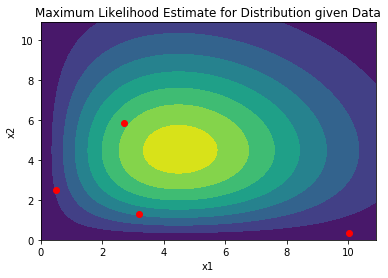

In [41]:
x1 = np.arange(0, 11, 0.1)
x2 = np.arange(0, 11, 0.1)
lambda0 = 0.024844485168696383
lambda1 = 0.0006172484432975746
xx1, xx2 = np.meshgrid(x1, x2, sparse=True)
z = 4*lambda1**2*xx1*xx2*np.exp(-lambda0*(xx1**2+xx2**2))
h = plt.contourf(x1,x2,z)

data = [(0.5,2.5), (3.2,1.3), (2.72,5.84),(10.047,0.354)]
x1_data = [p[0] for p in data]
x2_data = [p[1] for p in data]
plt.plot(x1_data, x2_data, 'ro')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Maximum Likelihood Estimate for Distribution given Data')

<div class="answer">

<br>
*Your Answer Here*
<br>

</div>

<div class="answer-separator">
------------------------
</div>

## Question 3: Still Missing! 

**Coding required**

Recall from Homework 1 Question 2 that we explored working with missing data using the wine quality dataset from the UCI Machine Learning Repository.  Re-Read the data in the `wine_quality_missing.csv` into a pandas dataframe and store the dataframe in the variable `wine_df`. 

3.1. Drop impute `wine_df` and re-calculate estimates of the mean and standard deviation of the values of the Ash feature in the drop imputed dataset.

3.2. Use non-parametric bootstrap on the drop imputed dataset to find the standard errors for both your mean and standard deviation estimates.

3.3. Mean impute `wine_df` and re-calculate estimates of the mean and standard deviation of the values of the Ash feature in the mean imputed dataset.

3.4. Use non-parametric bootstrap on the mean imputed dataset to find the standard errors for both your mean and standard deviation estimates.

3.5. Compare the standard errors between the two different types of imputation.  Do they differ?  If so what might be the cause of the difference?


### Answers

<div class="answer-separator">
------------------------
</div>

<h4>3.1. Drop impute `wine_df` and re-calculate estimates of the mean and standard deviation of the values of the Ash feature in the drop imputed dataset.</h4>

In [42]:
wine_df = pd.read_csv("wine_quality_missing.csv")
wine_drop = wine_df.dropna()
print("The mean is {} and the standard deviation is {}".format(np.mean(wine_drop.Ash), np.std(wine_drop.Ash)))

The mean is 2.369767441860465 and the standard deviation is 0.2996857918281888


<div class="answer">

<br>
For the drop imputed dataset, the mean is 2.37 and the standard deviation is 0.300
<br>

</div>

<div class="answer-separator">
------------------------
</div>

<h4>3.2. Use non-parametric bootstrap on the drop imputed dataset to find the standard errors for both your mean and standard deviation estimates.</h4>

In [43]:
# Resample the data
additional_ash_samples_np = np.random.choice(wine_drop.Ash, size=(1000000,len(wine_drop.Ash)), replace=True)

# calculate mean and std of replications
mean_replications = np.mean(additional_ash_samples_np, axis=1)
std_replications = np.std(additional_ash_samples_np, axis=1)

# calculate standard error of mean and std
mean_standard_error = np.std(mean_replications)
std_standard_error = np.std(std_replications)

print("The standard error of the mean is {} and the standard error of the standard deviation is {}"
      .format(mean_standard_error, std_standard_error)
     )

The standard error of the mean is 0.045699829091285775 and the standard error of the standard deviation is 0.03735324910684119


<div class="answer">

<br>
For the drop imputed dataset, the standard error of the mean is 0.0457 and the standard error of the standard deviation is 0.0373
<br>

</div>

<div class="answer-separator">
------------------------
</div>

<h4>3.3. Mean impute `wine_df` and re-calculate estimates of the mean and standard deviation of the values of the Ash feature in the mean imputed dataset.</h4>

In [44]:
ash_mean_imputed = wine_df.Ash.fillna(np.mean(wine_df.Ash))
print("The mean is {} and the std is {}".format(np.mean(ash_mean_imputed), np.std(ash_mean_imputed)))

The mean is 2.366217948717949 and the std is 0.26427629172770306


<div class="answer">

<br>
For the mean imputed dataset, the mean is 2.37 and the std is 0.264
<br>

</div>

<div class="answer-separator">
------------------------
</div>

<h4>3.4. Use non-parametric bootstrap on the mean imputed dataset to find the standard errors for both your mean and standard deviation estimates.</h4>

In [45]:
# Resample the data
additional_ash_samples_np = np.random.choice(ash_mean_imputed, size=(1000000,len(wine_drop.Ash)), replace=True)
# calculate mean and std of replications
mean_replications = np.mean(additional_ash_samples_np, axis=1)
std_replications = np.std(additional_ash_samples_np, axis=1)

# calculate standard error of mean and std
mean_standard_error = np.std(mean_replications)
std_standard_error = np.std(std_replications)

print("The standard error of the mean is {} and the standard error of the standard deviation is {}"
      .format(mean_standard_error, std_standard_error)
     )

The standard error of the mean is 0.040298829416414855 and the standard error of the standard deviation is 0.037565898983023004


<div class="answer">

<br>
For the mean imputed dataset, The standard error of the mean is 0.0403 and the standard error of the standard deviation is 0.0376
<br>

</div>

<div class="answer-separator">
------------------------
</div>

<h4>3.5. Compare the standard errors between the two different types of imputation.  Do they differ?  If so what might be the cause of the difference?</h4>

<div class="answer">

<br>
*Your Answer Here*
<br>

</div>

<div class="answer-separator">
<p>
The standard error for the mean in the drop-imputed dataset is higher than in the mean-imputed dataset. By imputing the mean, the generating process approximated by our data has lower variance. Our replications will be more concentrated around the mean, which means that the standard error is lower.
<p>
The standard error for the standard deviation is about the same in the mean imputed and drop imputed datasets.
</div>